<a href="https://colab.research.google.com/github/botchway44/ai-colabs/blob/main/%5BDionTimmer_controlnet_qrcode%5D_SD_1_5_and_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credits and license: https://huggingface.co/DionTimmer/controlnet_qrcode
License:

In [ ]:
pip -q install diffusers transformers accelerate torch xformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 56.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.2/7.2 MB 93.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.6/227.6 kB 30.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 109.1/109.1 MB 16.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 236.8/236.8 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 121.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 85.2 MB/s eta 0:00:00


  0%|          | 0/142 [00:00<?, ?it/s]

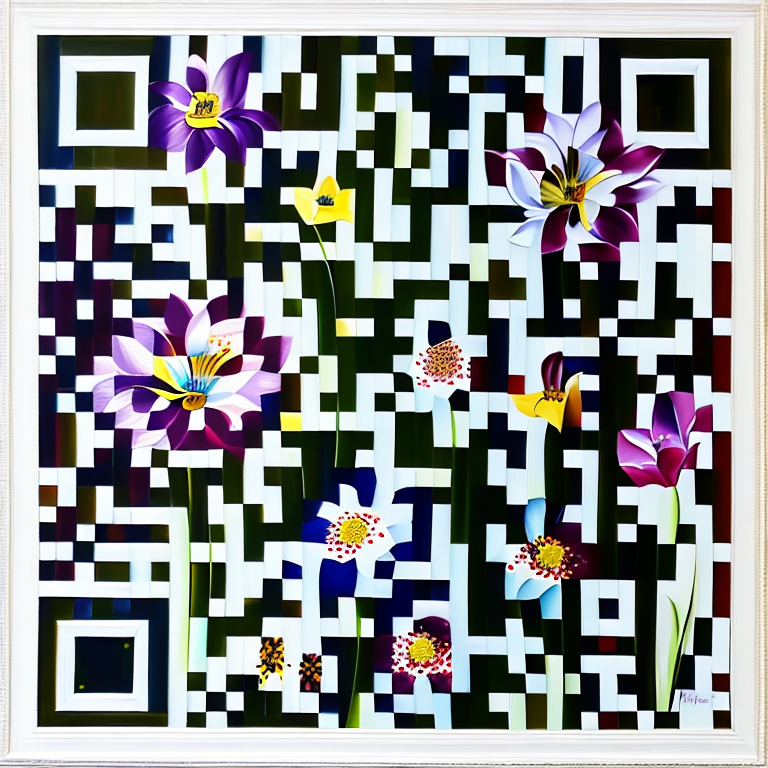

In [ ]:
import torch
import os
from PIL import Image
from diffusers import StableDiffusionControlNetImg2ImgPipeline, ControlNetModel, DDIMScheduler
from diffusers.utils import load_image

controlnet = ControlNetModel.from_pretrained("DionTimmer/controlnet_qrcode-control_v11p_sd21",
                                             torch_dtype=torch.float16)

pipe = StableDiffusionControlNetImg2ImgPipeline.from_pretrained(
    "stabilityai/stable-diffusion-2-1",
    controlnet=controlnet,
    safety_checker=None,
    torch_dtype=torch.float16
)

pipe.enable_xformers_memory_efficient_attention()
pipe.scheduler = DDIMScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()

def resize_for_condition_image(input_image: Image, resolution: int):
    input_image = input_image.convert("RGB")
    W, H = input_image.size
    k = float(resolution) / min(H, W)
    H *= k
    W *= k
    H = int(round(H / 64.0)) * 64
    W = int(round(W / 64.0)) * 64
    img = input_image.resize((W, H), resample=Image.LANCZOS)
    return img


# Get the path to the source image file [Upload your own QR code image file, use a QR code generator]
source_image_path = os.path.join(os.getcwd(), "/content/qr-code_dli.png")
source_image = load_image(source_image_path)

# Get the path to the init image file [Upload your own image file](initial image, anything)
source_init_image = os.path.join(os.getcwd(), "/content/qr-code_dli.png")
init_image = load_image(source_init_image)

condition_image = resize_for_condition_image(source_image, 768)
init_image = resize_for_condition_image(init_image, 768)
generator = torch.manual_seed(829712)

# prompt [add your own prompt]
prompt="flowers painting"

image = pipe(prompt=prompt,
             negative_prompt="ugly, cloud, disfigured, low quality, blurry, nsfw",
             image=init_image,
             control_image=condition_image,
             width=768,
             height=768,
             guidance_scale=20,
             controlnet_conditioning_scale=1.5,
             generator=generator,
             strength=0.95,
             num_inference_steps=150,
            )

image.images[0]
